<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/ml/working_single_node_neural_network_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Neuron: Logistc Regression

This neural network has:

1. Input layer [x1, x2, ....]

2.  4 layers.  Don't count the first one.   

- layer 1 is 5 nuerons, layer 2 is 5 neurons, layer 3 is 3 neurons, layer 4 is one neuron, the last layer has 1 neuron which outputs the prediction ŷ




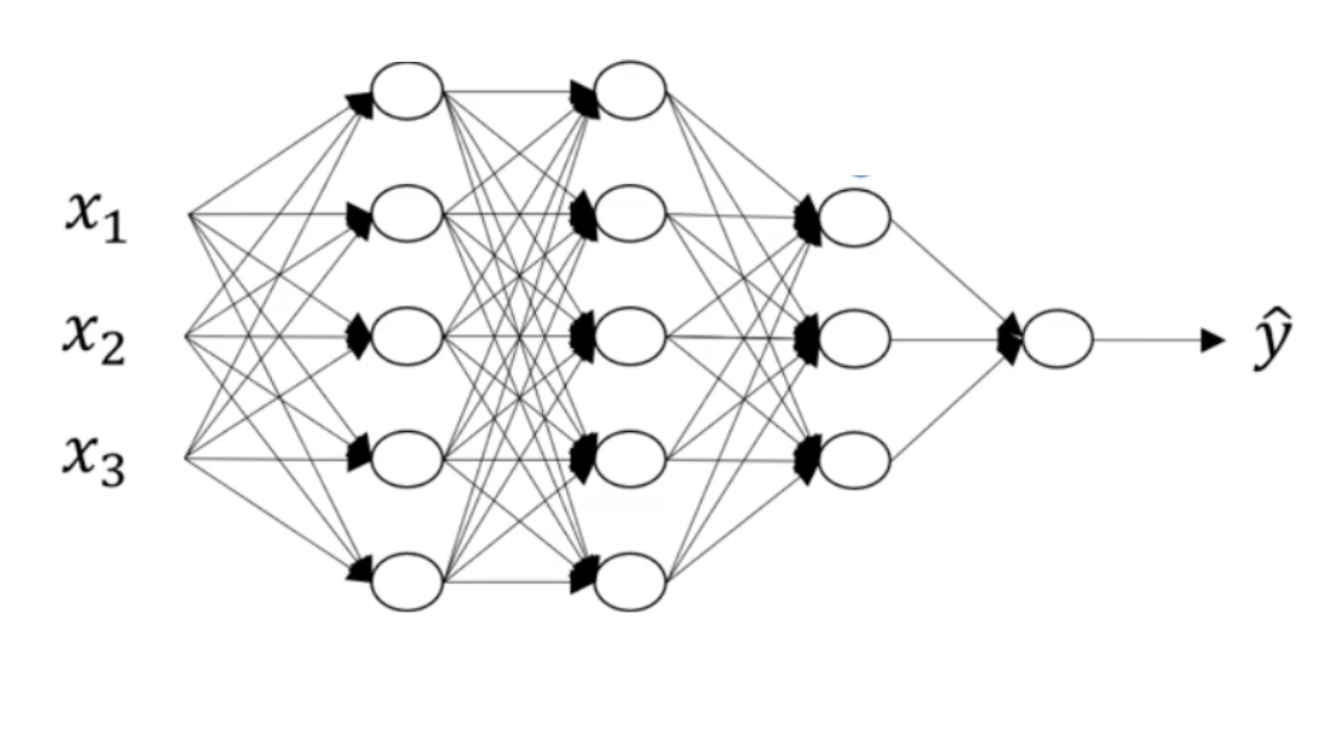

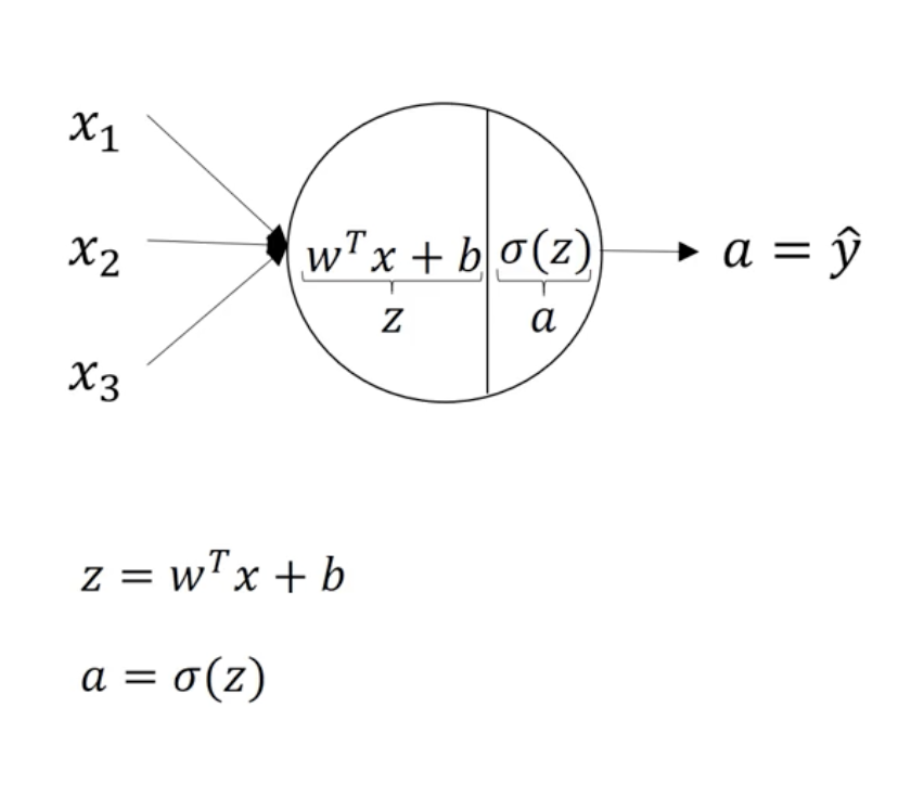

# What does the Neuron Do?

1. z = multiplication $z = w^{T}x + b$
2. activation function we call $a = 1 / (1 + e**-z)$.  When it is in the final layer of the the neural network is is also the prediction ŷ

# Loss Function
At the end of the neural network you have a loss function.  You keep looping through the neural network, updating the weights and bias (as explained below) to find the minimum loss.



#Sigmoid Activation Function

$\hat{y}_i = \sigma(z_i) = \frac{1}{1 + e^{-z_i}}$



## Loss Function:
  $$
  \mathscr{L}(a, y)= -\frac{1}{N} \sum_{i=1}^N \left[ y_i \log(\hat{y}_i) + (1 - y_i)\log(1 - \hat{y}_i) \right] = J(W,b)
  $$


For a scalar:
```
loss = - (y * np.log(ŷ) + (1 - y) * np.log(1 - ŷ))
```

> **Note**  That is for a scalar.  For a vector in Python it is:
>
> ```
> loss = -np.mean(y * np.log(ŷ) + (1 - y) * np.log(1 - ŷ))
> ```   



## Gradient of Logistic Loss Function



 Let the logistic loss be:

$\quad
\mathscr{L} = -\left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right)
$

Then

$\hat{y}_i = \sigma(z_i) = \frac{1}{1 + e^{-z_i}}$

Then, by the chain rule:

$\frac{\partial \mathscr{L}}{\partial z_i} = \frac{\partial \mathscr{L}}{\partial \hat{y}_i} \cdot \frac{\partial \hat{y}_i}{\partial z_i}
$

Which simplifies to:

$
\frac{\partial \, \mathscr{L}}{\partial z_i} = \hat{y}_i - y_i
$



##Gradients

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})  
$$


$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)}  
$$

```
db =  ŷ - y

dw = (ŷ - y) * x
```  

##Gradient Descent (Back Propagation)
Update weights and bias based upon learning rate $\alpha$ and gradient:



 $\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$

 ```
# learning rate
  lr = 0.1

# update weight and bias
  b = b - lr * db

  w = w - lr * dw

```


In [ ]:
import numpy as np

def sigmoid(z):

  return  1 / (1 + np.exp(-z))

def loss(ŷ,y):

  return - (y * np.log(ŷ) + (1 - y) * np.log(1 - ŷ))


# input features
x = np.array([1,2,3])

# actual observed output value
y = np.array(1)

# initialize weights
w = np.random.rand(3)

print("\ninitial weights", w)

# initialize bias b
b = 0

print("\ninitial bias", b)


def forward_pass(w,x,b,y):

  # calculate z, the linear output
  z = np.dot(w,x) + b

  #print("\nz", z)

  # calculate the activation,  this is also the prediction ŷ
  ŷ = sigmoid(z)
  #print("\nprediction ŷ", ŷ)

  # calculate the loss
  l = loss(ŷ,y)

  #print("\nloss l", l)

  return ŷ, y, w, b, l

# gradients

def back_progagation(ŷ, y, w, b):

  db =  ŷ - y

  dw = (ŷ - y) * x

  # calculate gradients
  #print("\ndb", db)

  #print("dw", dw)

  # learning rate
  lr = 0.1

  # update weight and bias
  b = b - lr * db
  #print("\nnew bias b", b)

  w = w - lr * dw
  #print("\nnew weights w", w)

  return w , b

# how many times to loop
cnt = 100

while cnt > 0:
  ŷ, y, w, b, l = forward_pass(w,x,b,y)
  if cnt%5 ==0:
    print("loss", l)
  w , b= back_progagation(ŷ, y, w, b)
  cnt -= 1

print("\nfinal weights", w)
print("\nfinal bias", b)

print("\nnow make prediction")

ŷ = sigmoid(np.dot(w,x)+b)
print("\npredicted value ŷ", ŷ)

print("\nobserved value y", y)


# and since it's logistic regression

if ŷ > 0.5:
  print("\nlogistic regression", True)


initial weights [0.19207753 0.62462424 0.49748121]

initial bias 0
loss 0.05182947375208096
loss 0.03744417902426488
loss 0.029289890079341196
loss 0.0240443131334547
loss 0.020388574490680624
loss 0.017695821232917883
loss 0.01563022467447959
loss 0.013995742600552582
loss 0.012670278388654478
loss 0.011573836686500824
loss 0.010651824730496803
loss 0.00986571477945388
loss 0.009187542001160733
loss 0.008596518029071246
loss 0.00807686847206225
loss 0.007616407717627051
loss 0.0072055735869821285
loss 0.006836757607441267
loss 0.006503830437078625
loss 0.006201799183958066

final weights [0.33818271 0.9168346  0.93579674]

final bias 0.1461051782288972

now make prediction

predicted value ŷ 0.9940909716334608

observed value y 1

logistic regression True


In [ ]:
400%4

0

# Basic neural network algorithm definition


1. **forward pass** means update w and based upon the second part which is called

2. **back progagation** means to calculate the derivative of the loss function




##Gradients

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})  
$$


$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)}  
$$



# Sigmoid Activation Function

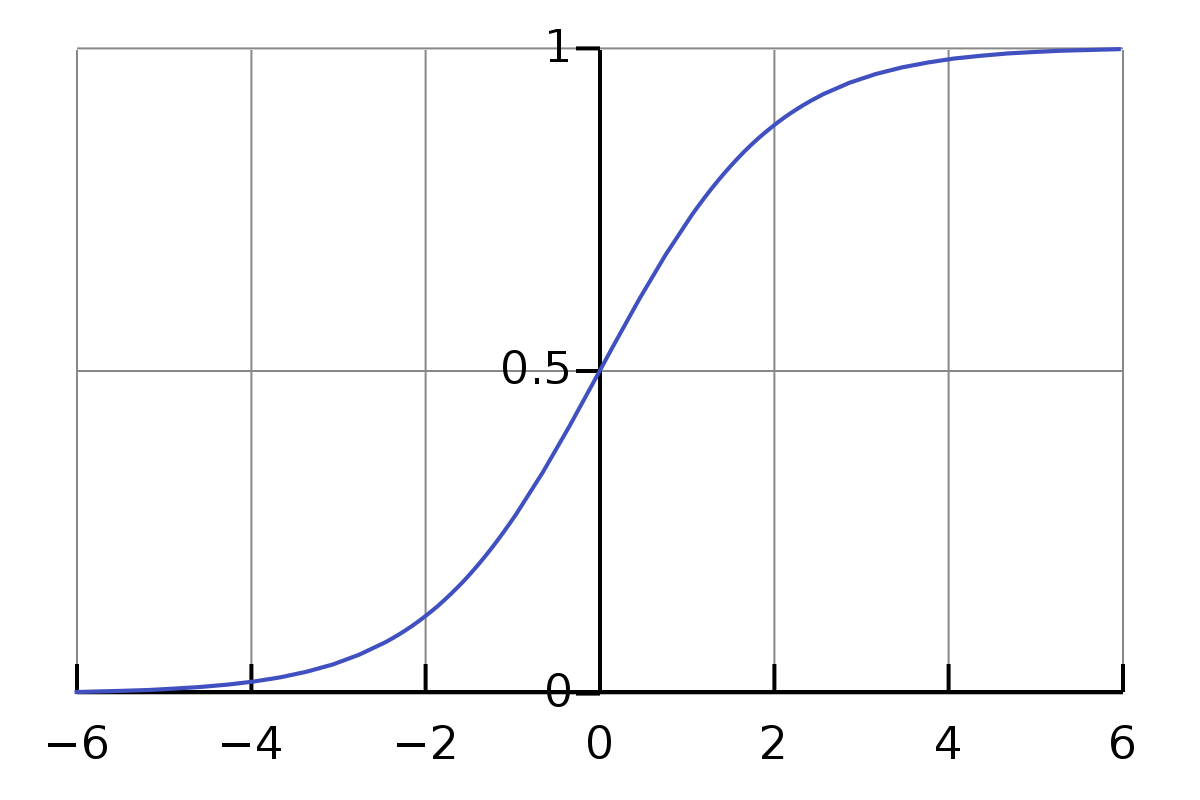



## Forward Pass

- **Input:** $x$
- **Parameters:** $w, b$
- **Linear Combination:**
  $$
  z = w^T x + b
  $$
- **Activation:**
  $$
  a = \sigma(z)
  $$
  where $\sigma(z)$ is the sigmoid function.
- **Loss Function:**
  $$
  \mathscr{L}(a, y)= -\frac{1}{N} \sum_{i=1}^N \left[ y_i \log(\hat{y}_i) + (1 - y_i)\log(1 - \hat{y}_i) \right] = J(W,b)
  $$







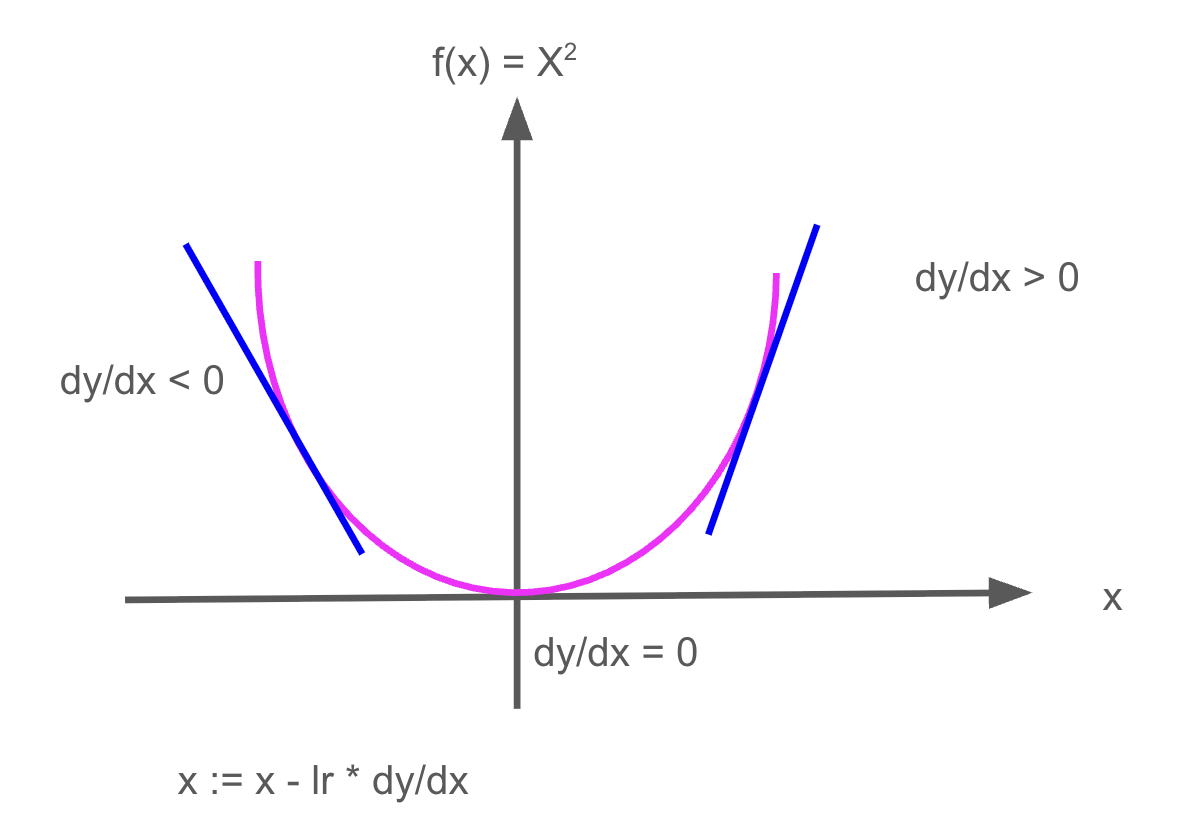

# math needed for homework


 Let the logistic loss be:

$\quad
\mathscr{L} = -\left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right)
$

Then

$\hat{y}_i = \sigma(z_i) = \frac{1}{1 + e^{-z_i}}$

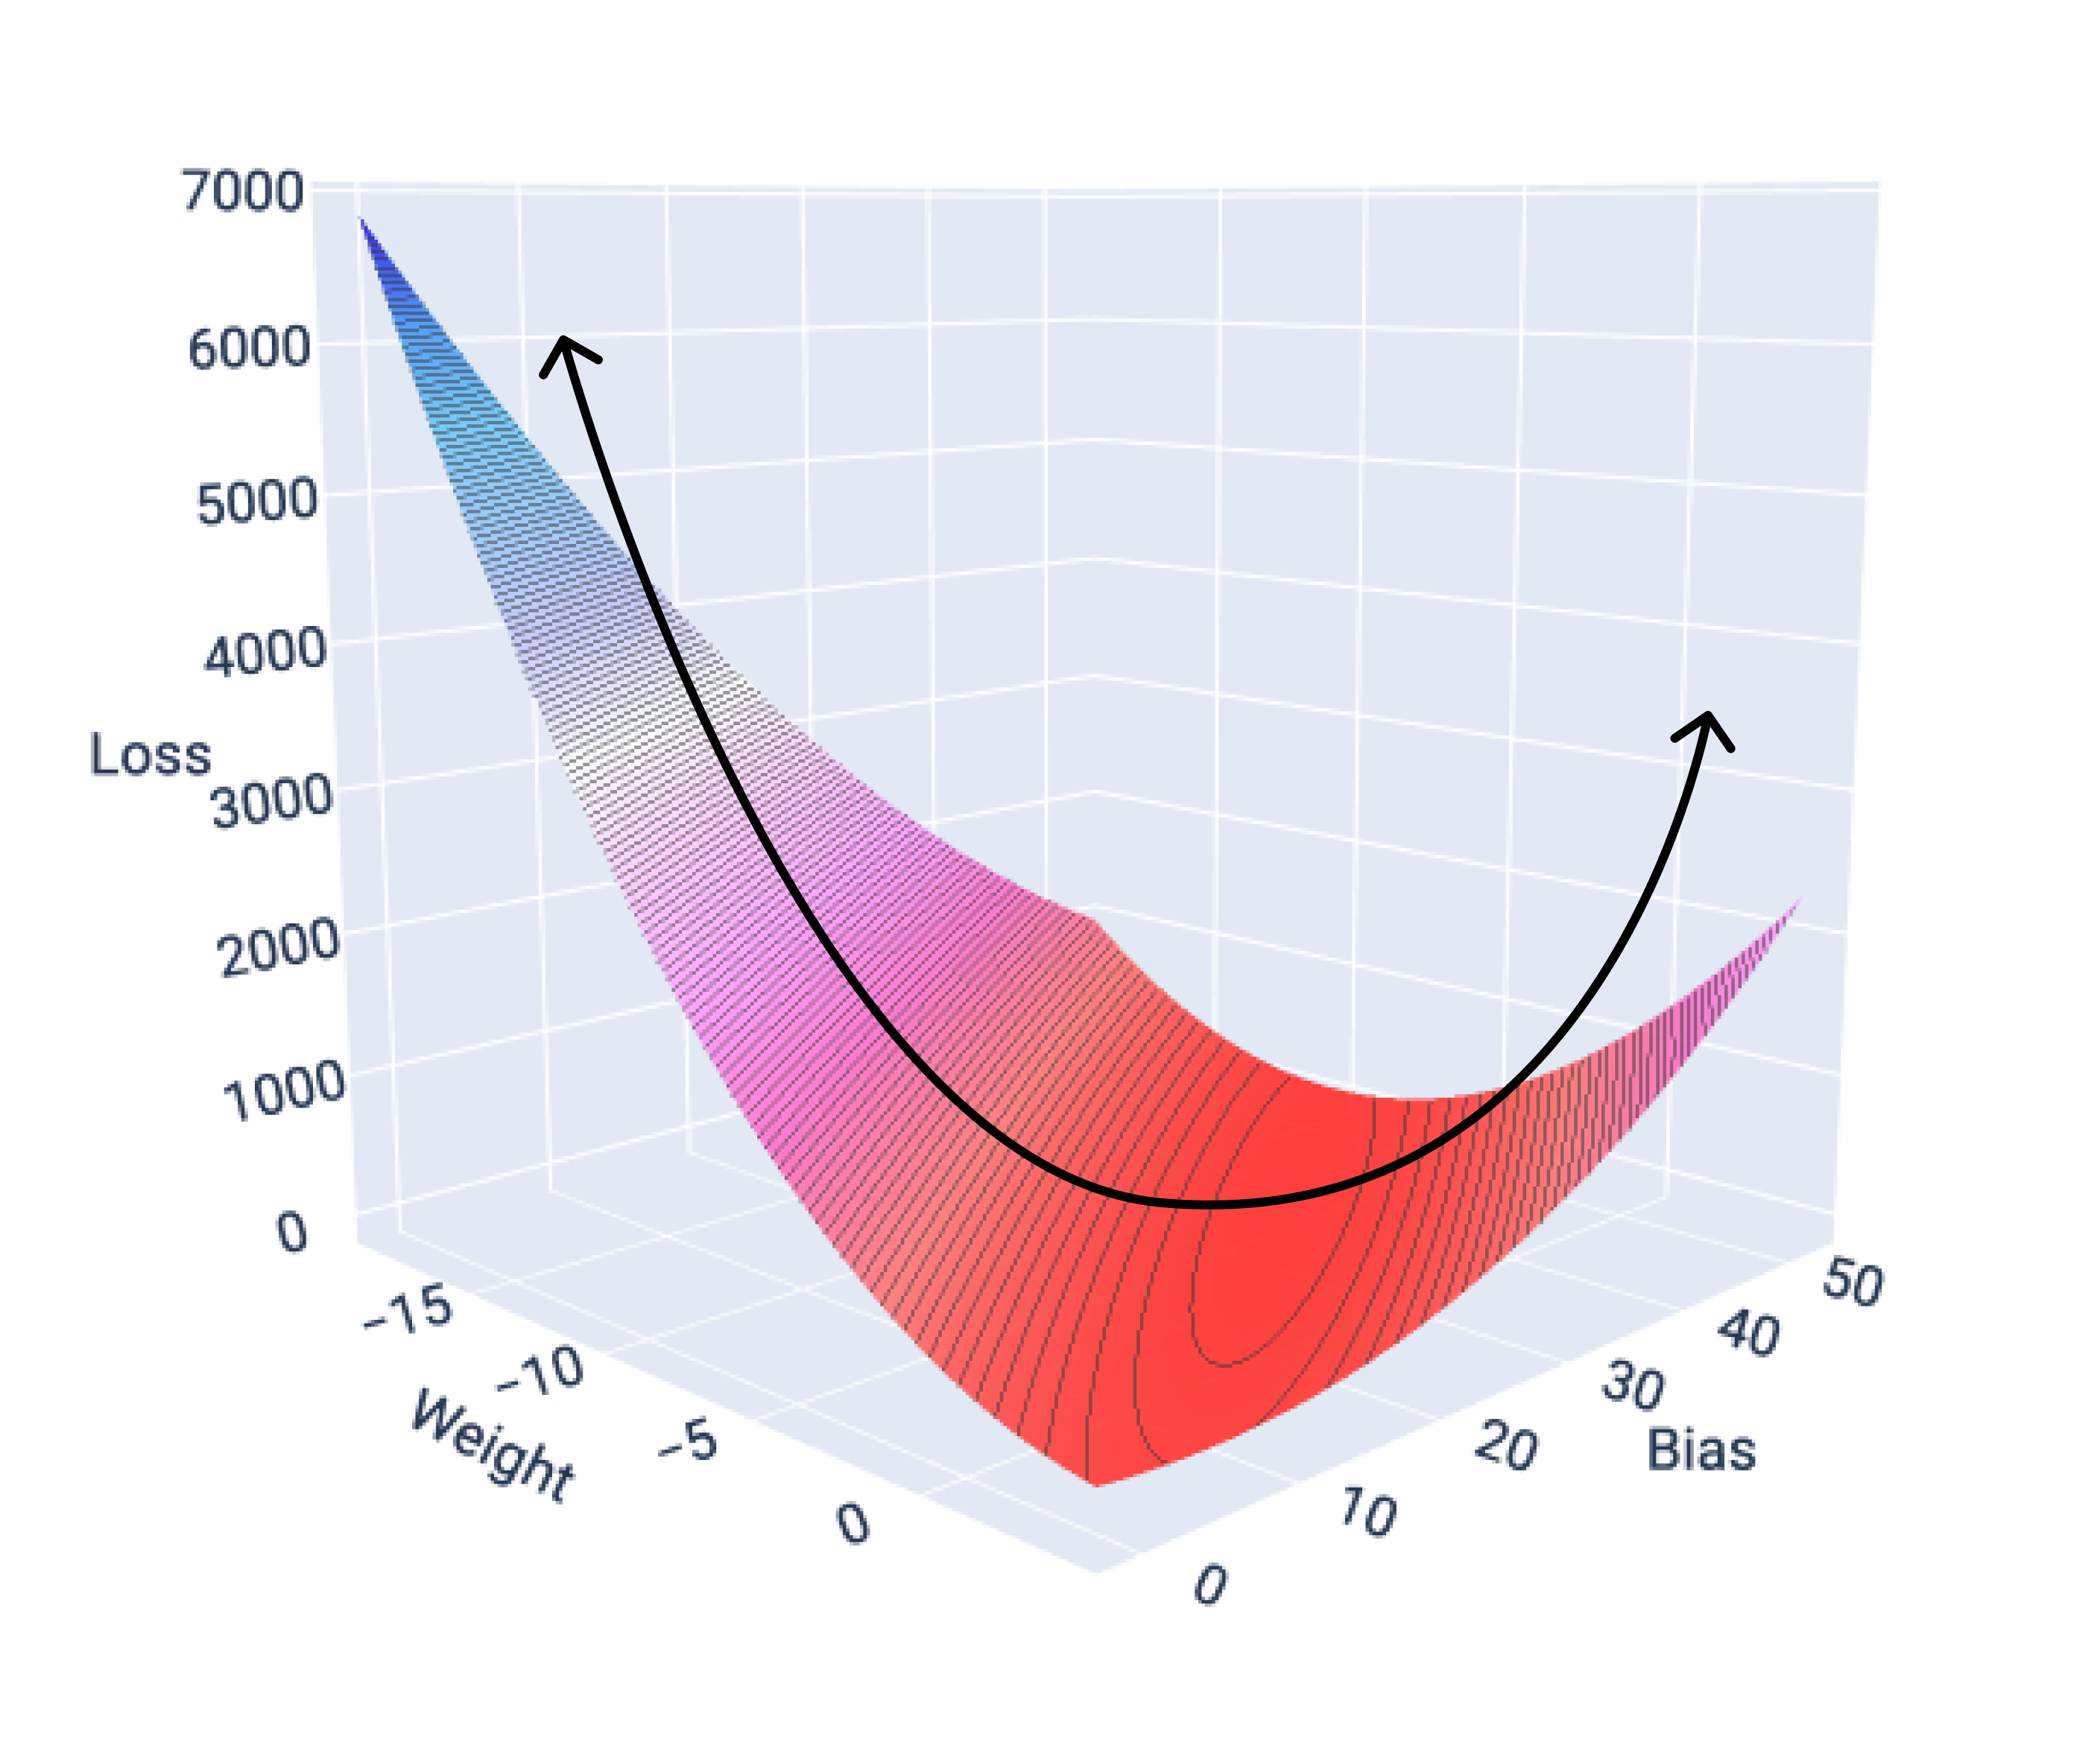

[grapdic source Google](https://developers.google.com/machine-learning/crash-course/linear-regression/gradient-descent)




# Show Simplification of Log Loss Derivative

# Gradient of the Log Loss Function

## Show that the log loss function gradient simplifies to $\hat{y} - y$

### 1. Start with the binary log loss (for one data point):

$$
\ell(y, \hat{y}) = -\left[ y\log(\hat{y}) + (1-y)\log(1-\hat{y}) \right]
$$

where

$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

---

### 2. Compute $\frac{\partial \ell}{\partial z}$ using the chain rule:

We need $\frac{\partial \ell}{\partial z}$. First, by the chain rule:

$$
\frac{\partial \ell}{\partial z}
= \frac{\partial \ell}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z}
$$

---

#### Step 2.1: Calculate $\frac{\partial \ell}{\partial \hat{y}}$

$$
\frac{\partial \ell}{\partial \hat{y}}
= -\left( \frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}} \right)
$$

---

#### Step 2.2: Calculate $\frac{\partial \hat{y}}{\partial z}$

Recall the sigmoid derivative:

$$
\frac{\partial \hat{y}}{\partial z}
= \hat{y} (1 - \hat{y})
$$

---

#### Step 2.3: Combine

Multiply:

$$
\frac{\partial \ell}{\partial z}
= \left[ -\frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}} \right] \cdot \hat{y}(1-\hat{y})
$$

Expand both terms:

- $-\frac{y}{\hat{y}}\hat{y}(1-\hat{y}) = -y(1-\hat{y})$
- $\frac{1-y}{1-\hat{y}}\hat{y}(1-\hat{y}) = (1-y)\hat{y}$

So,

$$
\frac{\partial \ell}{\partial z}
= -y(1-\hat{y}) + (1-y)\hat{y}
$$

Expand:

$$
= -y + y\hat{y} + \hat{y} - y\hat{y}
$$

Notice $+y\hat{y} - y\hat{y} = 0$:

$$
= -y + \hat{y}
$$

Or, in standard order:

$$
\frac{\partial \ell}{\partial z} = \hat{y} - y
$$

---

## **Summary Table**

| Derivative                          | Result         |
|-------------------------------------|---------------|
| $\frac{\partial \ell}{\partial z}$  | $\hat{y} - y$ |

---

**This result is why, during training, the gradient with respect to the pre-sigmoid output $z$ in logistic regression is simply the difference between the prediction and the true label: $\hat{y} - y$.**

Let me know if you want the corresponding gradient with respect to the weights $\mathbf{w}$!


# Calculation Predictions
Now that you have found the weight $w$ and bias $b$ use Z and the sigmoid activation function to calculate the probability.  If p > 0.1 then 1 (true.)



# Derivation of the Logistic Loss Function

## Introduction

The **logistic loss function** (also called log loss, cross-entropy loss, or negative log likelihood) is widely used in binary classification problems—especially in logistic regression. It measures the performance of a classification model whose output is a probability value between 0 and 1.

## Logistic Model Output

For input features $ \mathbf{x} $ and weights $ \mathbf{w} $:

$$
z = \mathbf{w}^\top \mathbf{x}
$$
$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

where $ \sigma(z) $ is the **sigmoid function**, mapping any real value to the interval (0,1).

## Desired Loss Behavior

We want:
- Low loss when the true label $ y $ matches the predicted probability $ \hat{y} $
- High loss when the prediction is wrong

## Step-by-Step Derivation

1. **Binary Labels and Probabilities**

   The true labels $ y $ are either 0 or 1. The model predicts $ \hat{y} $, the probability that $ y = 1 $.

2. **Probability Formulation**

   The **likelihood** for one sample:
   $$
   P(y|\mathbf{x}) = \hat{y}^y \cdot (1 - \hat{y})^{1 - y}
   $$
   - If $ y = 1 $: $ P = \hat{y} $
   - If $ y = 0 $: $ P = 1 - \hat{y} $

3. **Negative Log-Likelihood**

   To encourage high probability for correct labels, we take the negative log:
   $$
   \ell(y, \hat{y}) = -\log(P(y|\mathbf{x}))
   $$
   $$
   = -\log\left( \hat{y}^y \cdot (1 - \hat{y})^{1 - y} \right)
   $$
   $$
   = -\left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]
   $$

   This is the **logistic loss** function.

## Final Form of the Logistic Loss

For a single sample:
$$
\ell(y, \hat{y}) = -\left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]
$$

For a dataset of $ N $ samples, the average loss is:
$$
L = -\frac{1}{N} \sum_{i=1}^N \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

## Summary Table

| Symbol       | Meaning                        |
|--------------|-------------------------------|
| $ y $         | True label (0 or 1)               |
| $ \hat{y} $    | Predicted probability             |
| $ \ell $       | Logistic (cross-entropy) loss     |

## Key Points

- The function penalizes confident but wrong predictions especially harshly.
- Logistic loss is fundamental for training models in binary classification tasks.


## Further Clarification of Derivation of the Log Loss Function

# Why Do We Take the Negative Log in Logistic Loss?

## 1. Probabilities and Likelihood

- The model predicts a probability ($\hat{y}$) for each possible class, given the inputs.
- For a dataset, we want to **maximize the probability** (likelihood) that the model assigns to the true/observed labels ($y$). This is called the **likelihood function**.

## 2. Maximizing Likelihood = Minimizing Negative Log-Likelihood

- **Likelihood**: For $N$ independent samples, the joint likelihood is the product of individual probabilities:
  $$
  L = \prod_{i=1}^N P(y_i | x_i)
  $$
- Working with products of small probability values is numerically unstable, so we take the **logarithm** (log-likelihood), which turns the product into a sum:
  $$
  \log L = \sum_{i=1}^N \log P(y_i | x_i)
  $$
- In practice, optimization techniques (like gradient descent) typically **minimize** a cost function, not maximize it. So, we take the **negative** log-likelihood:
  $$
  -\log L = -\sum_{i=1}^N \log P(y_i | x_i)
  $$

## 3. Why Does the Negative Log Encourage Correct Predictions?

- If the predicted probability for the true label is **high** (close to 1), the log will be near 0, and the loss will be **low**.
- If the predicted probability for the true label is **low** (close to 0), the log will be a large negative number, making the negative log a **large positive loss**.
- Thus, minimizing negative log-likelihood **rewards high confidence in correct predictions and punishes low confidence or incorrect predictions**.

## 4. In Summary

> Taking the negative log of the likelihood turns the problem into one of minimizing a loss function that **strongly encourages the model to assign high probability to the correct label** and **discourages assigning low probability to the correct label**.


#Second Homework

Repeat the workd above and use [this data](https://raw.githubusercontent.com/werowe/HypatiaAcademy/refs/heads/master/ml/log-neuron.txt)